In [1]:
from src.trainer import train
import random
import numpy as np
import gymnasium as gym
import config

In [2]:
trained_agent = train()

Ep 10 reward 5.0 MA(100) 27.90 eps 0.951 alpha 0.095
Ep 20 reward -11.0 MA(100) 16.80 eps 0.905 alpha 0.090
Ep 30 reward 2.0 MA(100) 13.93 eps 0.860 alpha 0.086
Ep 40 reward 2.0 MA(100) 34.77 eps 0.818 alpha 0.082
Ep 50 reward -2.0 MA(100) 29.04 eps 0.778 alpha 0.078
Ep 60 reward 7.0 MA(100) 26.82 eps 0.740 alpha 0.074
Ep 70 reward 20.0 MA(100) 35.00 eps 0.704 alpha 0.070
Ep 80 reward 9.0 MA(100) 36.23 eps 0.670 alpha 0.067
Ep 90 reward -3.0 MA(100) 34.76 eps 0.637 alpha 0.064
Ep 100 reward 90.0 MA(100) 40.01 eps 0.606 alpha 0.061
q_table stats: min -19.232, mean 9.364, max 60.741
Ep 110 reward 4.0 MA(100) 45.44 eps 0.576 alpha 0.058
Ep 120 reward 18.0 MA(100) 45.23 eps 0.548 alpha 0.055
Ep 130 reward 0.0 MA(100) 45.15 eps 0.521 alpha 0.052
Ep 140 reward 16.0 MA(100) 37.93 eps 0.496 alpha 0.050
Ep 150 reward 104.0 MA(100) 44.42 eps 0.471 alpha 0.047
Ep 160 reward 104.0 MA(100) 52.75 eps 0.448 alpha 0.045
Ep 170 reward 383.0 MA(100) 63.78 eps 0.427 alpha 0.043
Ep 180 reward 124.0 MA(100

<frozen importlib._bootstrap>:241: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


Ep 510 reward 307.0 MA(100) 311.42 eps 0.078 alpha 0.010
Ep 520 reward 133.0 MA(100) 308.09 eps 0.074 alpha 0.010
Ep 530 reward 262.0 MA(100) 312.64 eps 0.070 alpha 0.010
Ep 540 reward 142.0 MA(100) 315.42 eps 0.067 alpha 0.010
Ep 550 reward 167.0 MA(100) 314.43 eps 0.063 alpha 0.010
Ep 560 reward 107.0 MA(100) 310.34 eps 0.060 alpha 0.010
Ep 570 reward 153.0 MA(100) 296.11 eps 0.057 alpha 0.010
Ep 580 reward 480.0 MA(100) 292.40 eps 0.055 alpha 0.010
Ep 590 reward 480.0 MA(100) 305.80 eps 0.052 alpha 0.010
Ep 600 reward 252.0 MA(100) 303.52 eps 0.049 alpha 0.010
q_table stats: min -27.261, mean 16.089, max 110.715
Ep 610 reward 174.0 MA(100) 289.68 eps 0.047 alpha 0.010
Ep 620 reward 162.0 MA(100) 296.99 eps 0.045 alpha 0.010
Ep 630 reward 155.0 MA(100) 295.31 eps 0.043 alpha 0.010
Ep 640 reward 480.0 MA(100) 303.09 eps 0.040 alpha 0.010
Ep 650 reward 265.0 MA(100) 301.08 eps 0.038 alpha 0.010
Ep 660 reward 480.0 MA(100) 301.32 eps 0.037 alpha 0.010
Ep 670 reward 368.0 MA(100) 301.29 

In [3]:
def test(fql_agent, num_episodes=100, render=False, seed=None, max_steps=None, verbose=True):
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)

    env = gym.make(config.ENV_NAME)
    max_steps = max_steps or getattr(config, "MAX_STEPS_PER_EPISODE", 1000)

    prev_eps = getattr(fql_agent, "epsilon", None)
    if prev_eps is not None:
        fql_agent.epsilon = 0.0

    episode_rewards = []
    try:
        for ep in range(1, num_episodes + 1):
            if seed is not None:
                obs, _ = env.reset(seed=seed + ep)
            else:
                obs, _ = env.reset()

            total_reward = 0.0
            terminated = truncated = False
            steps = 0
            cart_pos, cart_vel, pole_angle, pole_ang_vel = obs
            action = fql_agent.get_initial_action([float(pole_angle), float(pole_ang_vel)])

            while not (terminated or truncated) and steps < max_steps:
                obs, reward, terminated, truncated, _ = env.step(int(action))
                total_reward += reward
                steps += 1

                if terminated or truncated:
                    break

                _, _, pole_angle, pole_ang_vel = obs
                action = fql_agent.get_action([float(pole_angle), float(pole_ang_vel)])

            episode_rewards.append(total_reward)

            if verbose and (ep == 1 or ep % 10 == 0 or ep == num_episodes):
                recent_ma = float(np.mean(episode_rewards[-100:]))
                print(f"[Test] Ep {ep}/{num_episodes} reward {total_reward:.1f} recent_MA({min(100,len(episode_rewards))}) {recent_ma:.2f}")

    finally:
        if prev_eps is not None:
            fql_agent.epsilon = prev_eps
        env.close()

    stats = {
        "mean": float(np.mean(episode_rewards)),
        "std": float(np.std(episode_rewards)),
        "min": float(np.min(episode_rewards)),
        "max": float(np.max(episode_rewards)),
        "median": float(np.median(episode_rewards)),
    }

    if verbose:
        print("=== Evaluation summary ===")
        print(f"episodes: {len(episode_rewards)}  mean: {stats['mean']:.2f}  std: {stats['std']:.2f}  min: {stats['min']:.1f}  max: {stats['max']:.1f}")

    return episode_rewards, stats

In [4]:
test_rewards, test_stats = test(trained_agent[0], num_episodes=50, render=True, seed=42)

[Test] Ep 1/50 reward 500.0 recent_MA(1) 500.00
[Test] Ep 10/50 reward 500.0 recent_MA(10) 500.00
[Test] Ep 20/50 reward 500.0 recent_MA(20) 500.00
[Test] Ep 30/50 reward 500.0 recent_MA(30) 496.17
[Test] Ep 40/50 reward 500.0 recent_MA(40) 497.12
[Test] Ep 50/50 reward 500.0 recent_MA(50) 497.70
=== Evaluation summary ===
episodes: 50  mean: 497.70  std: 16.10  min: 385.0  max: 500.0


In [7]:
import re
import matplotlib.pyplot as plt

log_text = """Ep 10 reward 5.0 MA(100) 27.90 eps 0.951 alpha 0.095
Ep 20 reward -11.0 MA(100) 16.80 eps 0.905 alpha 0.090
Ep 30 reward 2.0 MA(100) 13.93 eps 0.860 alpha 0.086
Ep 40 reward 2.0 MA(100) 34.77 eps 0.818 alpha 0.082
Ep 50 reward -2.0 MA(100) 29.04 eps 0.778 alpha 0.078
Ep 60 reward 7.0 MA(100) 26.82 eps 0.740 alpha 0.074
Ep 70 reward 20.0 MA(100) 35.00 eps 0.704 alpha 0.070
Ep 80 reward 9.0 MA(100) 36.23 eps 0.670 alpha 0.067
Ep 90 reward -3.0 MA(100) 34.76 eps 0.637 alpha 0.064
Ep 100 reward 90.0 MA(100) 40.01 eps 0.606 alpha 0.061
q_table stats: min -19.232, mean 9.364, max 60.741
Ep 110 reward 4.0 MA(100) 45.44 eps 0.576 alpha 0.058
Ep 120 reward 18.0 MA(100) 45.23 eps 0.548 alpha 0.055
Ep 130 reward 0.0 MA(100) 45.15 eps 0.521 alpha 0.052
Ep 140 reward 16.0 MA(100) 37.93 eps 0.496 alpha 0.050
Ep 150 reward 104.0 MA(100) 44.42 eps 0.471 alpha 0.047
Ep 160 reward 104.0 MA(100) 52.75 eps 0.448 alpha 0.045
Ep 170 reward 383.0 MA(100) 63.78 eps 0.427 alpha 0.043
Ep 180 reward 124.0 MA(100) 77.78 eps 0.406 alpha 0.041
Ep 190 reward 298.0 MA(100) 91.69 eps 0.386 alpha 0.039
Ep 200 reward 140.0 MA(100) 100.60 eps 0.367 alpha 0.037
q_table stats: min -28.846, mean 18.880, max 125.797
Ep 210 reward 120.0 MA(100) 105.16 eps 0.349 alpha 0.035
Ep 220 reward 118.0 MA(100) 121.88 eps 0.332 alpha 0.033
Ep 230 reward 134.0 MA(100) 144.55 eps 0.316 alpha 0.032
Ep 240 reward 162.0 MA(100) 161.63 eps 0.300 alpha 0.030
Ep 250 reward 243.0 MA(100) 171.64 eps 0.286 alpha 0.029
Ep 260 reward 124.0 MA(100) 184.93 eps 0.272 alpha 0.027
Ep 270 reward 133.0 MA(100) 183.45 eps 0.258 alpha 0.026
Ep 280 reward 332.0 MA(100) 186.41 eps 0.246 alpha 0.025
Ep 290 reward 253.0 MA(100) 189.34 eps 0.234 alpha 0.023
Ep 300 reward 119.0 MA(100) 186.00 eps 0.222 alpha 0.022
q_table stats: min -27.931, mean 18.409, max 126.317
Ep 310 reward 213.0 MA(100) 189.69 eps 0.211 alpha 0.021
Ep 320 reward 480.0 MA(100) 205.60 eps 0.201 alpha 0.020
Ep 330 reward 152.0 MA(100) 207.08 eps 0.191 alpha 0.019
Ep 340 reward 143.0 MA(100) 208.16 eps 0.182 alpha 0.018
Ep 350 reward 143.0 MA(100) 224.37 eps 0.173 alpha 0.017
Ep 360 reward 204.0 MA(100) 233.88 eps 0.165 alpha 0.016
Ep 370 reward 480.0 MA(100) 244.28 eps 0.157 alpha 0.016
Ep 380 reward 480.0 MA(100) 250.74 eps 0.149 alpha 0.015
Ep 390 reward 150.0 MA(100) 253.53 eps 0.142 alpha 0.014
Ep 400 reward 262.0 MA(100) 264.41 eps 0.135 alpha 0.013
q_table stats: min -27.475, mean 17.585, max 123.262
Ep 410 reward 124.0 MA(100) 273.31 eps 0.128 alpha 0.013
Ep 420 reward 134.0 MA(100) 270.74 eps 0.122 alpha 0.012
Ep 430 reward 238.0 MA(100) 265.58 eps 0.116 alpha 0.012
Ep 440 reward 204.0 MA(100) 270.26 eps 0.110 alpha 0.011
Ep 450 reward 415.0 MA(100) 270.05 eps 0.105 alpha 0.010
Ep 460 reward 480.0 MA(100) 271.52 eps 0.100 alpha 0.010
Ep 470 reward 223.0 MA(100) 281.83 eps 0.095 alpha 0.010
Ep 480 reward 106.0 MA(100) 294.58 eps 0.090 alpha 0.010
Ep 490 reward 248.0 MA(100) 297.83 eps 0.086 alpha 0.010
Ep 500 reward 480.0 MA(100) 300.32 eps 0.082 alpha 0.010
q_table stats: min -27.316, mean 17.146, max 117.325
<frozen importlib._bootstrap>:241: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.
Ep 510 reward 307.0 MA(100) 311.42 eps 0.078 alpha 0.010
Ep 520 reward 133.0 MA(100) 308.09 eps 0.074 alpha 0.010
Ep 530 reward 262.0 MA(100) 312.64 eps 0.070 alpha 0.010
Ep 540 reward 142.0 MA(100) 315.42 eps 0.067 alpha 0.010
Ep 550 reward 167.0 MA(100) 314.43 eps 0.063 alpha 0.010
Ep 560 reward 107.0 MA(100) 310.34 eps 0.060 alpha 0.010
Ep 570 reward 153.0 MA(100) 296.11 eps 0.057 alpha 0.010
Ep 580 reward 480.0 MA(100) 292.40 eps 0.055 alpha 0.010
Ep 590 reward 480.0 MA(100) 305.80 eps 0.052 alpha 0.010
Ep 600 reward 252.0 MA(100) 303.52 eps 0.049 alpha 0.010
q_table stats: min -27.261, mean 16.089, max 110.715
Ep 610 reward 174.0 MA(100) 289.68 eps 0.047 alpha 0.010
Ep 620 reward 162.0 MA(100) 296.99 eps 0.045 alpha 0.010
Ep 630 reward 155.0 MA(100) 295.31 eps 0.043 alpha 0.010
Ep 640 reward 480.0 MA(100) 303.09 eps 0.040 alpha 0.010
Ep 650 reward 265.0 MA(100) 301.08 eps 0.038 alpha 0.010
Ep 660 reward 480.0 MA(100) 301.32 eps 0.037 alpha 0.010
Ep 670 reward 368.0 MA(100) 301.29 eps 0.035 alpha 0.010
Ep 680 reward 480.0 MA(100) 299.82 eps 0.033 alpha 0.010
Ep 690 reward 349.0 MA(100) 299.35 eps 0.031 alpha 0.010
Ep 700 reward 480.0 MA(100) 305.76 eps 0.030 alpha 0.010
q_table stats: min -27.196, mean 15.198, max 103.436
Ep 710 reward 480.0 MA(100) 306.43 eps 0.028 alpha 0.010
Ep 720 reward 465.0 MA(100) 309.34 eps 0.027 alpha 0.010
Ep 730 reward 160.0 MA(100) 313.82 eps 0.026 alpha 0.010
Ep 740 reward 129.0 MA(100) 308.31 eps 0.024 alpha 0.010
Ep 750 reward 480.0 MA(100) 314.00 eps 0.023 alpha 0.010
Ep 760 reward 414.0 MA(100) 317.99 eps 0.022 alpha 0.010
Ep 770 reward 442.0 MA(100) 340.01 eps 0.021 alpha 0.010
Ep 780 reward 425.0 MA(100) 344.83 eps 0.020 alpha 0.010
Ep 790 reward 433.0 MA(100) 350.86 eps 0.019 alpha 0.010
Ep 800 reward 349.0 MA(100) 352.61 eps 0.018 alpha 0.010
q_table stats: min -27.143, mean 15.896, max 112.316
Ep 810 reward 444.0 MA(100) 364.95 eps 0.017 alpha 0.010
Ep 820 reward 332.0 MA(100) 359.75 eps 0.016 alpha 0.010
Ep 830 reward 320.0 MA(100) 366.10 eps 0.016 alpha 0.010
Ep 840 reward 349.0 MA(100) 374.58 eps 0.015 alpha 0.010
Ep 850 reward 383.0 MA(100) 373.71 eps 0.014 alpha 0.010
Ep 860 reward 344.0 MA(100) 377.08 eps 0.013 alpha 0.010
Ep 870 reward 293.0 MA(100) 359.13 eps 0.013 alpha 0.010
Ep 880 reward 294.0 MA(100) 349.33 eps 0.012 alpha 0.010
Ep 890 reward 331.0 MA(100) 337.40 eps 0.012 alpha 0.010
Ep 900 reward 277.0 MA(100) 337.90 eps 0.011 alpha 0.010
q_table stats: min -27.122, mean 16.623, max 112.666
Ep 910 reward 265.0 MA(100) 330.35 eps 0.010 alpha 0.010
Ep 920 reward 285.0 MA(100) 331.90 eps 0.010 alpha 0.010
Ep 930 reward 377.0 MA(100) 330.04 eps 0.010 alpha 0.010
Ep 940 reward 323.0 MA(100) 322.41 eps 0.010 alpha 0.010
Ep 950 reward 295.0 MA(100) 316.03 eps 0.010 alpha 0.010
Ep 960 reward 339.0 MA(100) 308.93 eps 0.010 alpha 0.010
Ep 970 reward 338.0 MA(100) 313.55 eps 0.010 alpha 0.010
Ep 980 reward 376.0 MA(100) 317.42 eps 0.010 alpha 0.010
Ep 990 reward 402.0 MA(100) 321.31 eps 0.010 alpha 0.010
Ep 1000 reward 269.0 MA(100) 318.68 eps 0.010 alpha 0.010
q_table stats: min -27.117, mean 16.124, max 113.648
Ep 1010 reward 480.0 MA(100) 324.48 eps 0.010 alpha 0.010
Ep 1020 reward 480.0 MA(100) 337.62 eps 0.010 alpha 0.010
Ep 1030 reward 480.0 MA(100) 343.22 eps 0.010 alpha 0.010
Ep 1040 reward 420.0 MA(100) 350.41 eps 0.010 alpha 0.010
Ep 1050 reward 480.0 MA(100) 358.88 eps 0.010 alpha 0.010
Ep 1060 reward 480.0 MA(100) 374.62 eps 0.010 alpha 0.010
Ep 1070 reward 480.0 MA(100) 384.68 eps 0.010 alpha 0.010
Ep 1080 reward 480.0 MA(100) 395.29 eps 0.010 alpha 0.010
Ep 1090 reward 281.0 MA(100) 392.53 eps 0.010 alpha 0.010
Ep 1100 reward 480.0 MA(100) 401.62 eps 0.010 alpha 0.010
q_table stats: min -27.116, mean 15.827, max 113.587
Ep 1110 reward 262.0 MA(100) 413.55 eps 0.010 alpha 0.010
Ep 1120 reward 438.0 MA(100) 399.03 eps 0.010 alpha 0.010
Ep 1130 reward 231.0 MA(100) 401.40 eps 0.010 alpha 0.010
Ep 1140 reward 290.0 MA(100) 395.21 eps 0.010 alpha 0.010
Ep 1150 reward 247.0 MA(100) 394.97 eps 0.010 alpha 0.010
Ep 1160 reward 303.0 MA(100) 378.19 eps 0.010 alpha 0.010
Ep 1170 reward 308.0 MA(100) 366.89 eps 0.010 alpha 0.010
Ep 1180 reward 480.0 MA(100) 357.16 eps 0.010 alpha 0.010
Ep 1190 reward 480.0 MA(100) 369.86 eps 0.010 alpha 0.010
Ep 1200 reward 480.0 MA(100) 369.07 eps 0.010 alpha 0.010
q_table stats: min -27.116, mean 15.717, max 107.714
Ep 1210 reward 480.0 MA(100) 361.94 eps 0.010 alpha 0.010
Ep 1220 reward 315.0 MA(100) 367.73 eps 0.010 alpha 0.010
Ep 1230 reward 480.0 MA(100) 364.88 eps 0.010 alpha 0.010
Ep 1240 reward 189.0 MA(100) 362.32 eps 0.010 alpha 0.010
Ep 1250 reward 480.0 MA(100) 356.74 eps 0.010 alpha 0.010
Ep 1260 reward 140.0 MA(100) 358.70 eps 0.010 alpha 0.010
Ep 1270 reward 480.0 MA(100) 362.00 eps 0.010 alpha 0.010
Ep 1280 reward 480.0 MA(100) 362.63 eps 0.010 alpha 0.010
Ep 1290 reward 163.0 MA(100) 347.94 eps 0.010 alpha 0.010
Ep 1300 reward 157.0 MA(100) 343.04 eps 0.010 alpha 0.010
q_table stats: min -29.659, mean 15.454, max 103.236
Ep 1310 reward 480.0 MA(100) 345.51 eps 0.010 alpha 0.010
Ep 1320 reward 182.0 MA(100) 345.38 eps 0.010 alpha 0.010
Ep 1330 reward 202.0 MA(100) 351.23 eps 0.010 alpha 0.010
Ep 1340 reward 166.0 MA(100) 347.75 eps 0.010 alpha 0.010
Ep 1350 reward 190.0 MA(100) 343.21 eps 0.010 alpha 0.010
Ep 1360 reward 412.0 MA(100) 342.05 eps 0.010 alpha 0.010
Ep 1370 reward 131.0 MA(100) 329.88 eps 0.010 alpha 0.010
Ep 1380 reward 205.0 MA(100) 325.56 eps 0.010 alpha 0.010
Ep 1390 reward 145.0 MA(100) 327.88 eps 0.010 alpha 0.010
Ep 1400 reward 118.0 MA(100) 317.92 eps 0.010 alpha 0.010
q_table stats: min -31.395, mean 15.379, max 98.855
Ep 1410 reward 145.0 MA(100) 300.88 eps 0.010 alpha 0.010
Ep 1420 reward 125.0 MA(100) 291.08 eps 0.010 alpha 0.010
Ep 1430 reward 437.0 MA(100) 272.79 eps 0.010 alpha 0.010
Ep 1440 reward 132.0 MA(100) 284.02 eps 0.010 alpha 0.010
Ep 1450 reward 480.0 MA(100) 291.58 eps 0.010 alpha 0.010
Ep 1460 reward 480.0 MA(100) 299.20 eps 0.010 alpha 0.010
Ep 1470 reward 331.0 MA(100) 312.91 eps 0.010 alpha 0.010
Ep 1480 reward 370.0 MA(100) 321.23 eps 0.010 alpha 0.010
Ep 1490 reward 446.0 MA(100) 328.55 eps 0.010 alpha 0.010
Ep 1500 reward 399.0 MA(100) 348.81 eps 0.010 alpha 0.010
q_table stats: min -31.650, mean 16.501, max 114.586
Ep 1510 reward 472.0 MA(100) 367.69 eps 0.010 alpha 0.010
Ep 1520 reward 426.0 MA(100) 382.04 eps 0.010 alpha 0.010
Ep 1530 reward 322.0 MA(100) 397.37 eps 0.010 alpha 0.010
Ep 1540 reward 307.0 MA(100) 396.06 eps 0.010 alpha 0.010
Ep 1550 reward 423.0 MA(100) 399.73 eps 0.010 alpha 0.010
Ep 1560 reward 480.0 MA(100) 403.36 eps 0.010 alpha 0.010
Ep 1570 reward 480.0 MA(100) 413.13 eps 0.010 alpha 0.010
Ep 1580 reward 480.0 MA(100) 420.02 eps 0.010 alpha 0.010
Ep 1590 reward 480.0 MA(100) 426.92 eps 0.010 alpha 0.010
Ep 1600 reward 480.0 MA(100) 429.80 eps 0.010 alpha 0.010
q_table stats: min -31.459, mean 18.648, max 146.475
Ep 1610 reward 480.0 MA(100) 434.42 eps 0.010 alpha 0.010
Ep 1620 reward 480.0 MA(100) 439.93 eps 0.010 alpha 0.010
Ep 1630 reward 480.0 MA(100) 447.61 eps 0.010 alpha 0.010
Ep 1640 reward 480.0 MA(100) 459.48 eps 0.010 alpha 0.010
Ep 1650 reward 480.0 MA(100) 469.59 eps 0.010 alpha 0.010
Solved at episode 1659 (moving avg 476.00)"""

ep_pattern = re.compile(
    r"Ep (\d+) reward ([\-\d\.]+) MA\(100\) ([\d\.]+) eps ([\d\.]+) alpha ([\d\.]+)"
)

q_pattern = re.compile(
    r"q_table stats: min ([\-\d\.]+), mean ([\-\d\.]+), max ([\-\d\.]+)"
)

episodes, rewards, moving_avg, epsilons, alphas = [], [], [], [], []
q_min, q_mean, q_max = [], [], []

for line in log_text.splitlines():
    ep_match = ep_pattern.search(line)
    if ep_match:
        episodes.append(int(ep_match.group(1)))
        rewards.append(float(ep_match.group(2)))
        moving_avg.append(float(ep_match.group(3)))
        epsilons.append(float(ep_match.group(4)))
        alphas.append(float(ep_match.group(5)))
    else:
        q_match = q_pattern.search(line)
        if q_match:
            q_min.append(float(q_match.group(1)))
            q_mean.append(float(q_match.group(2)))
            q_max.append(float(q_match.group(3)))


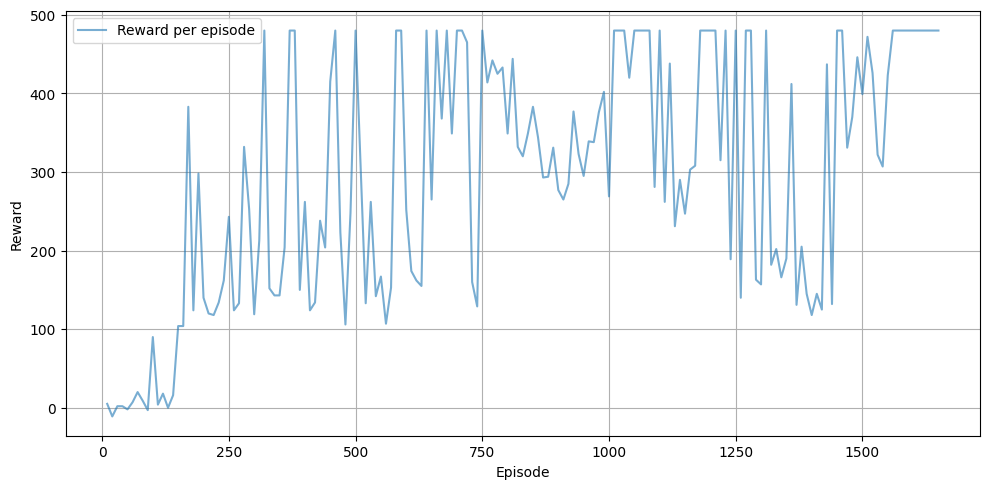

In [8]:
plt.figure(figsize=(10,5))
plt.plot(episodes, rewards, label="Reward per episode", alpha=0.6)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("reward_per_episode.png")
plt.show()

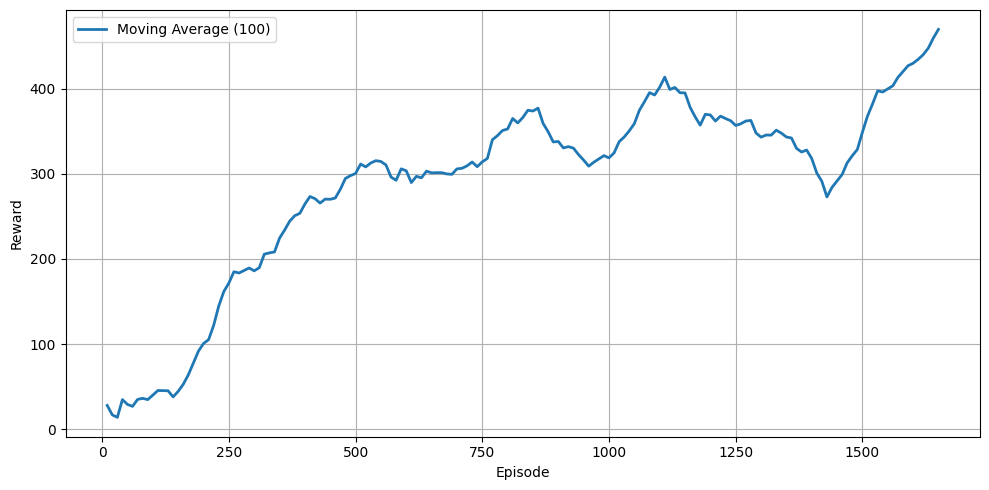

In [9]:
plt.figure(figsize=(10,5))
plt.plot(episodes, moving_avg, label="Moving Average (100)", linewidth=2)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("moving_avg.png")
plt.show()


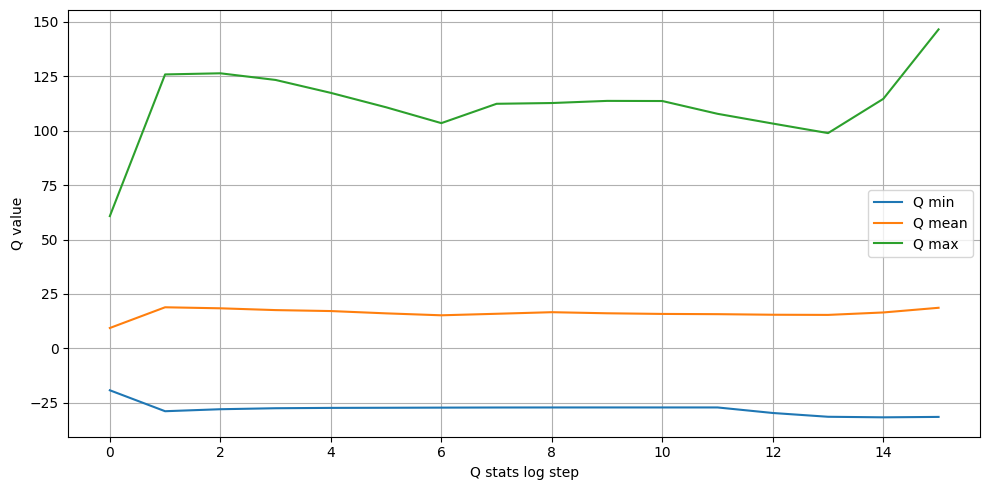

In [10]:
plt.figure(figsize=(10,5))
plt.plot(range(len(q_min)), q_min, label="Q min")
plt.plot(range(len(q_mean)), q_mean, label="Q mean")
plt.plot(range(len(q_max)), q_max, label="Q max")
plt.xlabel("Q stats log step")
plt.ylabel("Q value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("q_table_stats.png")
plt.show()

In [12]:
np.save(f"q_table_best_ep{1659}.npy", trained_agent[0].q_table)